In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.shape

(890, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

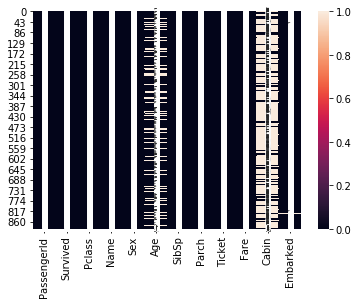

In [7]:
sns.heatmap(df.isnull(),annot=True)


In [8]:
df=df.replace(np.NaN,0)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,0,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

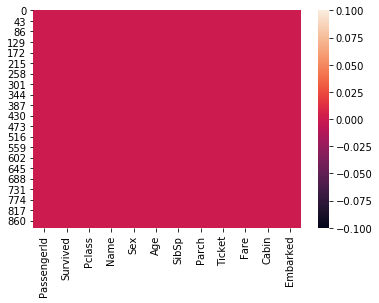

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
corr_=df.corr()

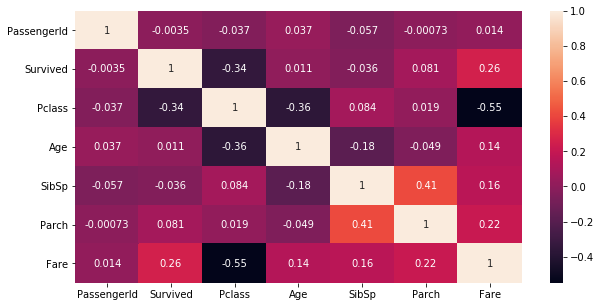

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_,annot=True)

In [15]:
df.shape

(890, 12)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df['Name'].describe()

count                                  890
unique                                 890
top       Madigan, Miss. Margaret "Maggie"
freq                                     1
Name: Name, dtype: object

In [19]:
df=df.drop('Name',axis=1)

In [20]:
df.shape

(890, 11)

In [21]:
df=df.drop('Ticket',axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,0,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,0,Q
886,887,0,2,male,27.0,0,0,13.0000,0,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,0.0,1,2,23.4500,0,S


In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
df['Sex'].describe()

count      890
unique       2
top       male
freq       576
Name: Sex, dtype: object

In [24]:
df['Cabin'].describe()

count     890
unique    148
top         0
freq      686
Name: Cabin, dtype: int64

In [25]:
df=df.drop('Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,0.0,1,2,23.4500,S


In [26]:
df['Embarked'].describe()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,0.0,1,2,23.4500,S


In [27]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [29]:
df['Sex']=le.transform(df['Sex'])
df['Sex'].dtypes

dtype('int32')

In [30]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [31]:
df['Embarked'].describe()

count     890
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [33]:
df['Embarked'].value_counts()

S    644
C    168
Q     76
0      2
Name: Embarked, dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0,strategy="most_frequent")
imp.fit(df[['Embarked']])
df['Embarked']=imp.fit_transform(df[['Embarked']]).ravel()
df['Embarked'].value_counts()

S    646
C    168
Q     76
Name: Embarked, dtype: int64

In [35]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [37]:
le=LabelEncoder()
le.fit(df['Embarked'])
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [38]:
df['Embarked']=le.fit_transform(df['Embarked'])
df['Embarked'].value_counts()

2    646
0    168
1     76
Name: Embarked, dtype: int64

In [39]:
df.dtypes
df.groupby('Pclass').mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,,
1,461.597222,0.629630,0.564815,32.923241,0.416667,0.356481,84.154687,1.203704
2,445.956522,0.472826,0.586957,28.091467,0.402174,0.380435,20.662183,1.798913
3,438.232653,0.242857,0.706122,18.148816,0.616327,0.393878,13.687643,1.585714


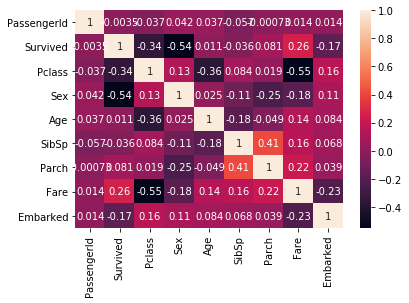

In [40]:
corr_=df.corr()
sns.heatmap(corr_,annot=True)

In [41]:
df.shape

(890, 9)

In [42]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
176,177,0,3,1,0.0,3,1,25.4667,2


In [43]:
df.skew()

PassengerId    0.000000
Survived       0.476647
Pclass        -0.628767
Sex           -0.617104
Age            0.264271
SibSp          3.693205
Parch          2.747139
Fare           4.785066
Embarked      -1.267034
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276D1510C88>,
      dtype=object)

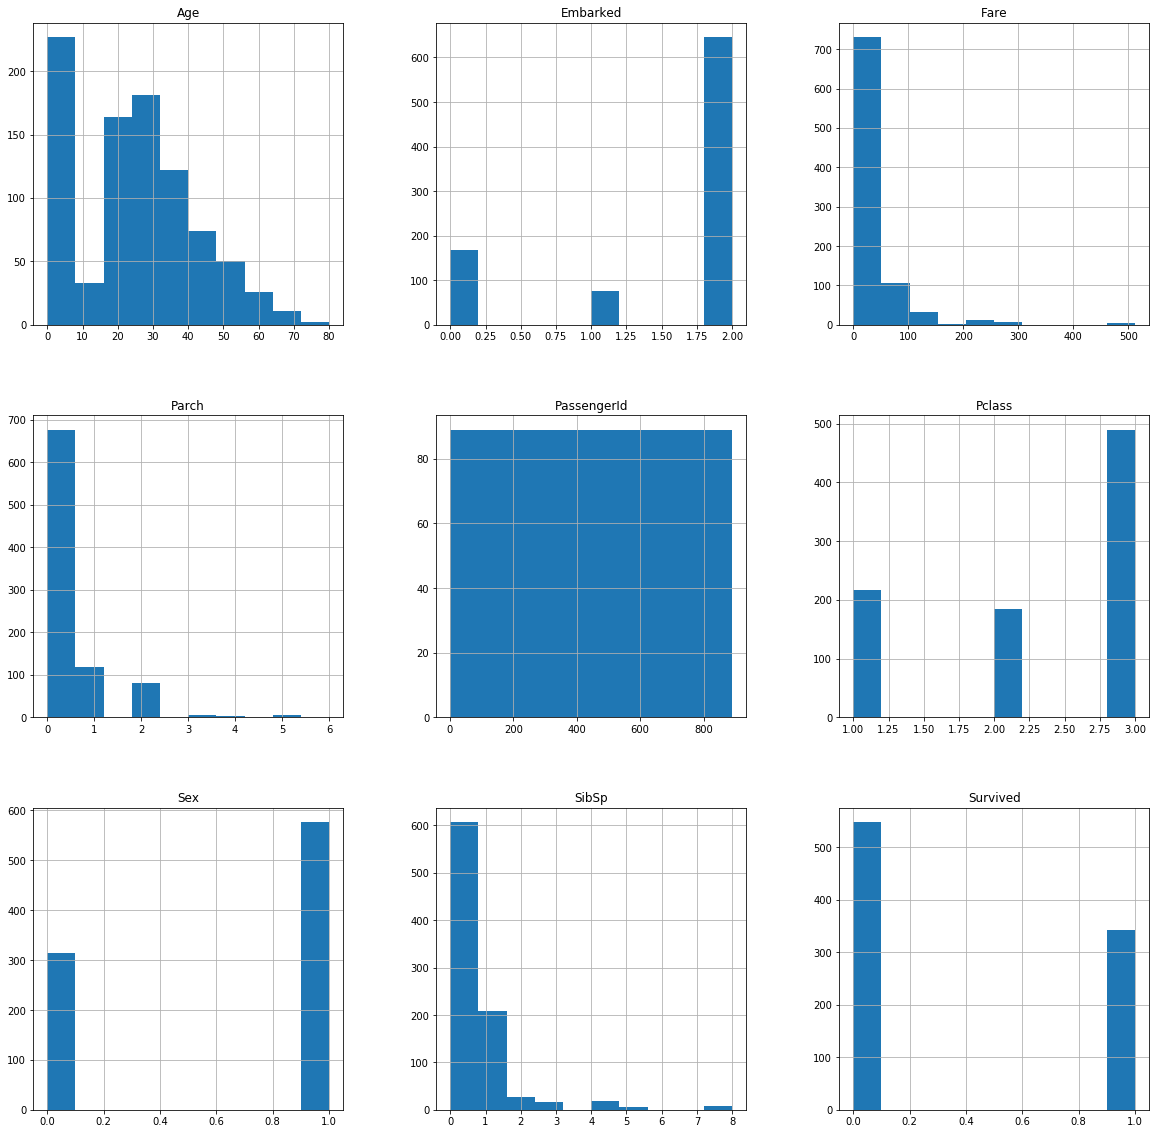

In [44]:
df.hist(figsize=(20,20))

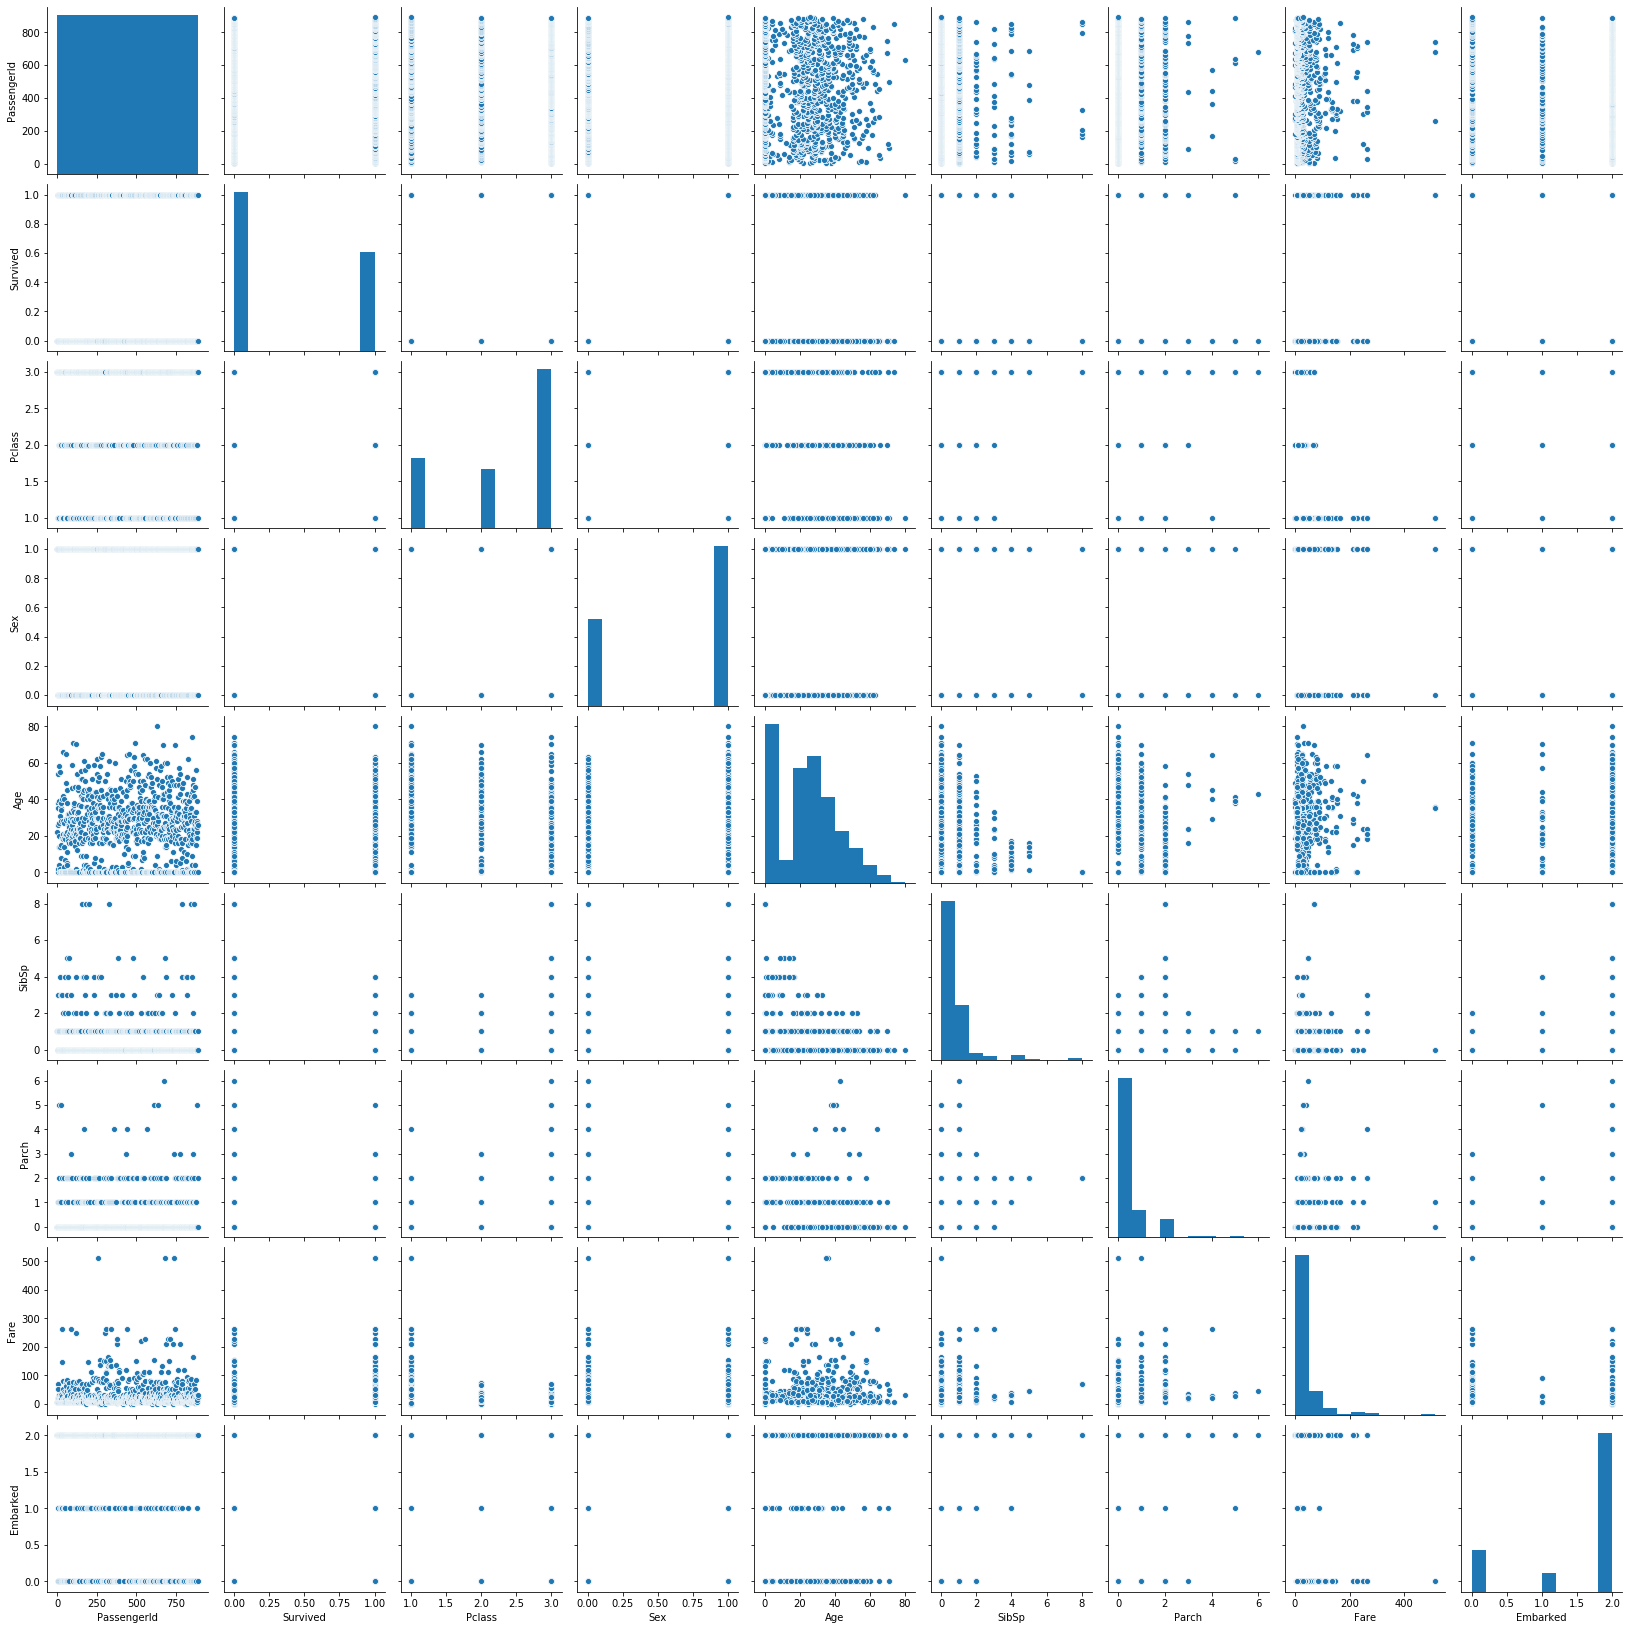

In [45]:
sns.pairplot(df)

In [46]:
#after converting 0 data to mean/median or else log will give error . 
df['Pclass']=np.log1p(df['Pclass'])
df['Sex']=np.log1p(df['Sex'])
df['SibSp']=np.log1p(df['SibSp'])
df['Parch']=np.log1p(df['Parch'])
df['Fare']=np.log1p(df['Fare'])
df['Embarked']=np.log1p(df['Embarked'])

df.skew()
    
    

PassengerId    0.000000
Survived       0.476647
Pclass        -0.770468
Sex           -0.617104
Age            0.264271
SibSp          1.659553
Parch          1.673673
Fare           0.393007
Embarked      -1.387887
dtype: float64

In [47]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [48]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,1.386294,0.693147,22.0,0.693147,0.000000,2.110213,1.098612
1,2,1,0.693147,0.000000,38.0,0.693147,0.000000,4.280593,0.000000
2,3,1,1.386294,0.000000,26.0,0.000000,0.000000,2.188856,1.098612
3,4,1,0.693147,0.000000,35.0,0.693147,0.000000,3.990834,1.098612
4,5,0,1.386294,0.693147,35.0,0.000000,0.000000,2.202765,1.098612
...,...,...,...,...,...,...,...,...,...
885,886,0,1.386294,0.000000,39.0,0.000000,1.791759,3.405355,0.693147
886,887,0,1.098612,0.693147,27.0,0.000000,0.000000,2.639057,1.098612
887,888,1,0.693147,0.000000,19.0,0.000000,0.000000,3.433987,1.098612
888,889,0,1.386294,0.000000,0.0,0.693147,1.098612,3.196630,1.098612


PassengerId       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Survived       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Pclass          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Sex            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Age            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.133621x0.343182)
Parch             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Fare               AxesSubplot(0.44569,0.125;0.133621x0.343182)
Embarked          AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

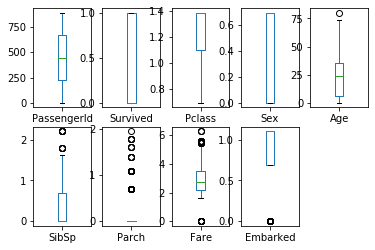

In [49]:
df.plot(kind='box',subplots=True,layout=(2,5))

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(849, 9)

PassengerId       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Survived       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Pclass          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Sex            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Age            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.133621x0.343182)
Parch             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Fare               AxesSubplot(0.44569,0.125;0.133621x0.343182)
Embarked          AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

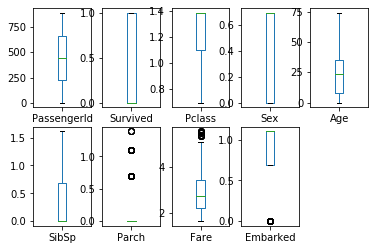

In [51]:
df.plot(kind='box',subplots=True,layout=(2,5))

In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [53]:
x=df.drop('Survived',axis=1)
y=df.iloc[:,1]
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
888    0
889    1
Name: Survived, Length: 849, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [55]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import r2_score,accuracy_score,classification_report,confusion_matrix


r_score=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print(r_score.mean())

r_score=cross_val_score(KNeighborsClassifier(),x,y,cv=5)
print(r_score.mean())

r_score=cross_val_score(LogisticRegression(),x,y,cv=5)
print(r_score.mean())


r_score=cross_val_score(SVC(),x,y,cv=5)
print(r_score.mean())


r_score=cross_val_score(GaussianNB(),x,y,cv=5)
print(r_score.mean())



0.7302888966237383
0.8080334145492516
0.778600765750087
0.8150922380786634
0.7585798816568048


In [56]:
max_r2_sc=0
final_r_state=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=r_state)
    svc=SVC()
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    r2_sc=r2_score(y_test,y_pred)
    print("max r2 score corresponding to random state : ",r_state,"   is : ",r2_sc)   
    if(r2_sc>max_r2_sc):
        max_r2_sc=r2_sc
        final_r_state=r_state
    
 



print("max r2 score corresponding to random state : ",final_r_state,"   is : ",max_r2_sc)   
   






max r2 score corresponding to random state :  42    is :  0.09313725490196101
max r2 score corresponding to random state :  43    is :  0.30967062716197913
max r2 score corresponding to random state :  44    is :  0.15000000000000013
max r2 score corresponding to random state :  45    is :  0.3711765542751455
max r2 score corresponding to random state :  46    is :  0.18637387387387405
max r2 score corresponding to random state :  47    is :  0.07281839622641506
max r2 score corresponding to random state :  48    is :  -0.10962765168372646
max r2 score corresponding to random state :  49    is :  0.4852941176470589
max r2 score corresponding to random state :  50    is :  0.30602477477477485
max r2 score corresponding to random state :  51    is :  0.26231802911534163
max r2 score corresponding to random state :  52    is :  0.27443448570209117
max r2 score corresponding to random state :  53    is :  0.097877358490566
max r2 score corresponding to random state :  54    is :  0.3137254

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=49)
svc=SVC()
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
y_pred=svc.predict(x_test)
r2_sc=r2_score(y_test,y_pred)
mean_abs_error=mean_absolute_error(y_test,y_pred)
mean_sqr_error=mean_squared_error(y_test,y_pred)
    
print("r2_score : ",r2_sc,"mean_abs_error",mean_abs_error,"mean_sqr_error",mean_sqr_error)
print("accuracy score::",accuracy_score(y_test,y_pred))
print("confusion matrix::")
print(confusion_matrix(y_test,y_pred))
print("classification report::",classification_report(y_test,y_pred))
    
    

0.8276877761413843
r2_score :  0.4852941176470589 mean_abs_error 0.12352941176470589 mean_sqr_error 0.12352941176470589
accuracy score:: 0.8764705882352941
confusion matrix::
[[95  7]
 [14 54]]
classification report::               precision    recall  f1-score   support

           0       0.87      0.93      0.90       102
           1       0.89      0.79      0.84        68

    accuracy                           0.88       170
   macro avg       0.88      0.86      0.87       170
weighted avg       0.88      0.88      0.88       170



In [58]:
from sklearn.externals import joblib
joblib.dump(svc,'svc_titanic.pkl')


C:\Users\kamalakanta.sahu\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['svc_titanic.pkl']

In [59]:
svcc=joblib.load('svc_titanic.pkl')

In [60]:
print(r2_score(y_test,svcc.predict(x_test)))

0.4852941176470589


In [61]:
#required 2d array for test .so converting to multiple column 

sample_df=pd.DataFrame(np.array([891,3,1,32.0,0,0,7.75,1]).reshape(1,-1))
print(sample_df.shape)
print(svcc.predict(sample_df))

(1, 8)
[0]
